## Random forest model with conformal prediction
the used set are the 100 cmpds with ki from pnas paper. they are all considered as actives.
the decoys are the 10.000 based on the 200xray compounds. they are all considered inactives

In [2]:
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

#load data
RADIUS=3
NBITS=2048
mols=[]
X=[]
y=[]
ki_set=pd.read_csv("ki_full_set.csv")
decoys=pd.read_csv("all_decoys.csv")
mols=[Chem.MolFromSmiles(smi) for smi in ki_set["SMILES"]]+[Chem.MolFromSmiles(smi) for smi in decoys["ligand"]]
X=[np.array(AllChem.GetMorganFingerprintAsBitVect(mol,RADIUS,nBits=NBITS)) for mol in mols]
y=[1 for i in range(len(list(ki_set["SMILES"])))]+[0 for i in range(len(list(decoys["ligand"])))]

In [3]:
ki_set

,ID,Mode,Ki,IC50,SMILES
0,Z6511,First docking screen,438.90,504.40,OC(=O)CCC1CCCN(C1)C=2N=CN=C3NC=CC23
1,Z9572,First docking screen,197.20,226.60,OC(=O)CC1CN(CCO1)C=2N=CN=C3NC=CC23
2,Z5722,First docking screen,403.70,464.00,CC(O)CNC=1C=C(N=CN1)N2CC3(CCC3)C(F)(C2)C(=O)O
3,Z2051,First docking screen,118.80,136.50,CC=1NC=2N=CN=C(N3CCOC(CC(F)(F)F)C3)C2C1C
4,Z4305,First docking screen,147.60,169.60,O=S1(=O)CCC2(C1)CCCN(C2)C=3N=CN=C4NC=CC34
...,...,...,...,...,...
77,Z3722,Open Structure Screen,22.80,26.20,OC(=O)CC(NC(=O)C=1C=C(F)C=C2NC=NC12)C=3C=CC(Br...
78,Z3122,Open Structure Screen,2.16,2.48,OC(=O)CC(NC(=O)C=1N=CN=C2NC=CC12)C=3C=CC(Br)=CC3
79,Z6645,Open Structure Screen,60.40,69.40,OC(=O)C1CC(NC(=O)C=2N=CN=C3SC=CC23)C=C1
80,Z6742,Open Structure Screen,36.90,42.40,CN1N=CC=2N=CN=C(NS(=O)(=O)CC=3C=CC(CC#N)=CC3)C12


# build models
warning: two important unusual dependencies: nonconformist and imbalanced learn. i installed these as follows:

`pip install nonconformist`

` conda install -c conda-forge imbalanced-learn`

non conformist may give some weird error related to splits in sklearn. if so here is the fix, just two lines of code in nc that need to bechanged https://github.com/donlnz/nonconformist/issues/16

In [12]:
from imblearn.ensemble import BalancedRandomForestClassifier
from nonconformist.cp import IcpClassifier
from nonconformist.acp import AggregatedCp
from nonconformist.nc import NcFactory,AbsErrorErrFunc
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsRegressor

X_train, X_test, y_train, y_test = train_test_split(np.array(X), np.array(y), test_size=0.2, random_state=42)

model = BalancedRandomForestClassifier(n_estimators=200,random_state=42)
nc = NcFactory.create_nc(model,normalizer_model=KNeighborsRegressor(n_neighbors=11))
icp = IcpClassifier(nc)
acp=AggregatedCp(icp)
acp.fit(X_train,y_train)
prediction = acp.predict(X_test, significance=0.2)

/Users/judewells/miniforge3/envs/cache/lib/python3.11/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/Users/judewells/miniforge3/envs/cache/lib/python3.11/site-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
/Users/judewells/miniforge3/envs/cache/lib/python3.11/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/Users/judewells/mi

/Users/judewells/miniforge3/envs/cache/lib/python3.11/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/Users/judewells/miniforge3/envs/cache/lib/python3.11/site-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
/Users/judewells/miniforge3/envs/cache/lib/python3.11/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/Users/judewells/mi

/Users/judewells/miniforge3/envs/cache/lib/python3.11/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/Users/judewells/miniforge3/envs/cache/lib/python3.11/site-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
/Users/judewells/miniforge3/envs/cache/lib/python3.11/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/Users/judewells/mi

/Users/judewells/miniforge3/envs/cache/lib/python3.11/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/Users/judewells/miniforge3/envs/cache/lib/python3.11/site-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
/Users/judewells/miniforge3/envs/cache/lib/python3.11/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/Users/judewells/mi

/Users/judewells/miniforge3/envs/cache/lib/python3.11/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/Users/judewells/miniforge3/envs/cache/lib/python3.11/site-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
/Users/judewells/miniforge3/envs/cache/lib/python3.11/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/Users/judewells/mi

/Users/judewells/miniforge3/envs/cache/lib/python3.11/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/Users/judewells/miniforge3/envs/cache/lib/python3.11/site-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
/Users/judewells/miniforge3/envs/cache/lib/python3.11/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/Users/judewells/mi

/Users/judewells/miniforge3/envs/cache/lib/python3.11/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/Users/judewells/miniforge3/envs/cache/lib/python3.11/site-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
/Users/judewells/miniforge3/envs/cache/lib/python3.11/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/Users/judewells/mi

/Users/judewells/miniforge3/envs/cache/lib/python3.11/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/Users/judewells/miniforge3/envs/cache/lib/python3.11/site-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
/Users/judewells/miniforge3/envs/cache/lib/python3.11/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/Users/judewells/mi

/Users/judewells/miniforge3/envs/cache/lib/python3.11/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/Users/judewells/miniforge3/envs/cache/lib/python3.11/site-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
/Users/judewells/miniforge3/envs/cache/lib/python3.11/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/Users/judewells/mi

/Users/judewells/miniforge3/envs/cache/lib/python3.11/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/Users/judewells/miniforge3/envs/cache/lib/python3.11/site-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
/Users/judewells/miniforge3/envs/cache/lib/python3.11/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/Users/judewells/mi

/Users/judewells/miniforge3/envs/cache/lib/python3.11/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/Users/judewells/miniforge3/envs/cache/lib/python3.11/site-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
/Users/judewells/miniforge3/envs/cache/lib/python3.11/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/Users/judewells/mi

/Users/judewells/miniforge3/envs/cache/lib/python3.11/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/Users/judewells/miniforge3/envs/cache/lib/python3.11/site-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
/Users/judewells/miniforge3/envs/cache/lib/python3.11/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/Users/judewells/mi

/Users/judewells/miniforge3/envs/cache/lib/python3.11/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/Users/judewells/miniforge3/envs/cache/lib/python3.11/site-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
/Users/judewells/miniforge3/envs/cache/lib/python3.11/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/Users/judewells/mi

/Users/judewells/miniforge3/envs/cache/lib/python3.11/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/Users/judewells/miniforge3/envs/cache/lib/python3.11/site-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
/Users/judewells/miniforge3/envs/cache/lib/python3.11/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/Users/judewells/mi

/Users/judewells/miniforge3/envs/cache/lib/python3.11/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/Users/judewells/miniforge3/envs/cache/lib/python3.11/site-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
/Users/judewells/miniforge3/envs/cache/lib/python3.11/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/Users/judewells/mi

/Users/judewells/miniforge3/envs/cache/lib/python3.11/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/Users/judewells/miniforge3/envs/cache/lib/python3.11/site-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
/Users/judewells/miniforge3/envs/cache/lib/python3.11/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/Users/judewells/mi

/Users/judewells/miniforge3/envs/cache/lib/python3.11/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/Users/judewells/miniforge3/envs/cache/lib/python3.11/site-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
/Users/judewells/miniforge3/envs/cache/lib/python3.11/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/Users/judewells/mi

/Users/judewells/miniforge3/envs/cache/lib/python3.11/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/Users/judewells/miniforge3/envs/cache/lib/python3.11/site-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
/Users/judewells/miniforge3/envs/cache/lib/python3.11/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/Users/judewells/mi

/Users/judewells/miniforge3/envs/cache/lib/python3.11/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/Users/judewells/miniforge3/envs/cache/lib/python3.11/site-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
/Users/judewells/miniforge3/envs/cache/lib/python3.11/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/Users/judewells/mi

/Users/judewells/miniforge3/envs/cache/lib/python3.11/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/Users/judewells/miniforge3/envs/cache/lib/python3.11/site-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
/Users/judewells/miniforge3/envs/cache/lib/python3.11/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/Users/judewells/mi

In [10]:
import dill
with open('saved_model.dill', 'wb') as f:
    dill.dump(acp, f)

# try the model on the whole set (number under 100 or so is active here)
the result is 18/100 True positives recognized and 5/10000 false positives out of the decoys set. This corresponds to a theoretical enrichment of ~80x

In [19]:
len(X)

10832

Text(0, 0.5, 'n winners')

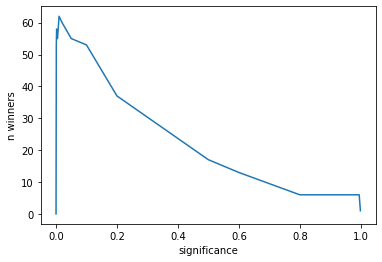

In [23]:
import matplotlib.pyplot as plt
sigs = [0.0001, 0.001, 0.002, 0.005, 0.01, 0.02,  0.05, 0.1, 0.2, 0.5, 0.6, 0.8, 0.9, 0.95, 0.99, 0.995, 0.999]
n_winners = []
for sig in sigs:
    predictions = acp.predict(np.array(X), significance=sig)
    winners = [(mols[i],i) for i,p in enumerate(predictions) if p[0]==False and p[1]==True]
    n_winners.append(len(winners))

plt.plot(sigs, n_winners)
plt.xlabel('significance')
plt.ylabel('n winners')

In [ ]:
#try on the whole set
prediction = acp.predict(np.array(X), significance=0.05) # significance 0.05 means confidence 95% see the docs on nonconformist

winners = [(mols[i],i) for i,p in enumerate(prediction) if p[0]==False and p[1]==True]
for win in winners:
    #display(win[0])
    print(win[1])

however the above also include the training data so thats mislreading. here are the stats for the test set:

In [3]:
from sklearn.metrics import matthews_corrcoef,balanced_accuracy_score
for sig in [0.2,0.1,0.05,0.02,0.01,0.005,0.002,0.001]:
    print("at significance level {} these are the metrics:".format(sig))
    prediction = acp.predict(np.array(X_test), significance=sig) # significance 0.05 means confidence 95% see the docs on nonconformist
    cleaned_prediction=[1 if p[0]==p[1] and p[0]==False else 0 for p in prediction]
    print("MCC: ",matthews_corrcoef(y_test,cleaned_prediction))
    print("bAcc:",balanced_accuracy_score(y_test,cleaned_prediction))

at significance level 0.2 these are the metrics:
MCC:  0.19654803593649967
bAcc: 0.8759065960991865
at significance level 0.1 these are the metrics:
MCC:  0.251612178318648
bAcc: 0.8158017249828482
at significance level 0.05 these are the metrics:
MCC:  0.44271455859037123
bAcc: 0.8348892482603156
at significance level 0.02 these are the metrics:
MCC:  0.5891807549595621
bAcc: 0.7619940213662648
at significance level 0.01 these are the metrics:
MCC:  0.6866507086204694
bAcc: 0.7368421052631579
at significance level 0.005 these are the metrics:
MCC:  0.6866507086204694
bAcc: 0.7368421052631579
at significance level 0.002 these are the metrics:
MCC:  0.32316653780733695
bAcc: 0.5526315789473684
at significance level 0.001 these are the metrics:
MCC:  0.0
bAcc: 0.5


In [6]:
from sklearn.metrics import matthews_corrcoef,balanced_accuracy_score
for sig in [0.2,0.1,0.05,0.02,0.01,0.005,0.002,0.001]:
    print("at significance level {} these are the metrics:".format(sig))
    prediction = acp.predict(np.array(X_test), significance=sig) # significance 0.05 means confidence 95% see the docs on nonconformist
    cleaned_prediction=[1 if p[1]==True and p[0]==False else 0 for p in prediction]
    print("MCC: ",matthews_corrcoef(y_test,cleaned_prediction))
    print("bAcc:",balanced_accuracy_score(y_test,cleaned_prediction))

at significance level 0.2 these are the metrics:
MCC:  0.22846049418853476
bAcc: 0.5263157894736842
at significance level 0.1 these are the metrics:
MCC:  0.5113255514471998
bAcc: 0.631578947368421
at significance level 0.05 these are the metrics:
MCC:  0.5113255514471998
bAcc: 0.631578947368421
at significance level 0.02 these are the metrics:
MCC:  0.5602586620321762
bAcc: 0.6578947368421053
at significance level 0.01 these are the metrics:
MCC:  0.6052885832442637
bAcc: 0.6842105263157895
at significance level 0.005 these are the metrics:
MCC:  0.6052885832442637
bAcc: 0.6842105263157895
at significance level 0.002 these are the metrics:
MCC:  0.7594729361267031
bAcc: 0.7894736842105263
at significance level 0.001 these are the metrics:
MCC:  0.793427636791639
bAcc: 0.8157894736842105


# load enamine library as explicit mols
or whatever other sdf

In [7]:
suppl = Chem.SDMolSupplier('Enamine_Hit_Locator_Library_HLL-460_460160cmpds_20220221.sdf')

mols=[mol for mol in suppl if mol!=None]
print("got mols")

got mols


# predict compounds in batches of 10000
i had to do it this way because 460K mols + fps didnt fit in my ram haha

In [ ]:
winners=[]
for i in range(len(mols)//10000+1):
    fps=[np.array(AllChem.GetMorganFingerprintAsBitVect(mol,RADIUS,nBits=NBITS)) for mol in mols[i*10000:(i+1)*10000]]
    print("step",i*10000)
    prediction = acp.predict(np.array(fps), significance=0.005) #Note the low significance level!! this is in order to filter most compounds
    cwinners = [(mols[i*10000:(i+1)*10000][j],i) for j,p in enumerate(prediction) if p[1]==True and p[0]==False]
    for win in cwinners:
        #display(win[0]) #uncomment this if you want to see the molecules
        winners.append(win[0])

filter carboxylates and save:

In [13]:
# Define a function to check if a SMILES string contains a carboxylic acid or carboxylate group
def contains_carboxylic_acid_or_carboxylate(mol):
    carboxylate_pattern = Chem.MolFromSmarts('[CX3](=O)[OX1H0-,OX2H1]')
    return mol.HasSubstructMatch(carboxylate_pattern)

no_carbox_mols=[]
for m in winners:
    if contains_carboxylic_acid_or_carboxylate(m)==False:
        no_carbox_mols.append(m)
        
from rdkit.Chem import inchi
original_inchis=[inchi.MolToInchiKey(Chem.MolFromSmiles(smi)) for smi in ki_set["SMILES"]]
no_dupe_mols=[]
for m in no_carbox_mols:
    if inchi.MolToInchiKey(m) not in original_inchis:
        no_dupe_mols.append(m)
        
print("there are {} duplicates. ive removed them.".format(len(no_carbox_mols)-len(no_dupe_mols)))
        
w = Chem.SDWriter("molecules_confidence_0.005_no_carbox_corrected.sdf")
print(len(no_dupe_mols))
for m in no_dupe_mols:
    w.write(m)
w.close()

there are 2 duplicates
211


# make a similarity matrix of the actives and the predicted actives

got mols


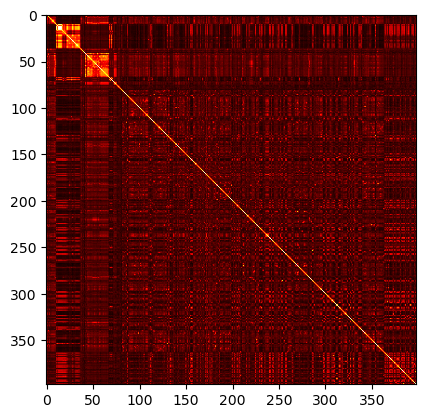

In [14]:
from rdkit import DataStructs
from matplotlib import pyplot as plt
suppl = Chem.SDMolSupplier('molecules_confidence_0.005_no_carbox.sdf')

pred_mols=[mol for mol in suppl if mol!=None]
original_mols=[Chem.MolFromSmiles(smi) for smi in ki_set["SMILES"]]
all_mols=original_mols+pred_mols
print("got mols")
all_fps = [AllChem.GetMorganFingerprintAsBitVect(mol,RADIUS,nBits=NBITS) for mol in all_mols]
ts_matrix=np.zeros((len(all_mols),len(all_mols)))
for i,fp in enumerate(all_fps):
    ts_matrix[i,:i+1]=DataStructs.BulkTanimotoSimilarity(fp,all_fps[:i+1])
    ts_matrix[:i+1,i]=ts_matrix[i,:i+1]
    
plt.imshow(ts_matrix, cmap='hot')
plt.show()